# 1. Dataset Summary & Exploration

['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']


(array([  4.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.70000000e+01,   3.40000000e+01,   5.00000000e+01,
          9.30000000e+01,   1.53000000e+02,   1.48000000e+02,
          4.29000000e+02,   6.41000000e+02,   4.69700000e+03,
          5.85000000e+02,   3.43000000e+02,   4.77000000e+02,
          1.12000000e+02,   1.11000000e+02,   8.10000000e+01,
          2.50000000e+01,   1.30000000e+01,   6.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00]),
 array([-0.9426954 , -0.87793889, -0.81318237, -0.74842586, -0.68366935,
        -0.61891283, -0.55415632, -0.48939981, -0.42464329, -0.35988678,
        -0.29513027, -0.23037375, -0.16561724, -0.10086073, -0.03610421,
         0.0286523 ,  0.09340881,  0.15816533,  0.22292184,  0.28767835,
         0.35243487,  0.41719138,  0.48194789,  0.54670441,  0.61146092,
         0.67

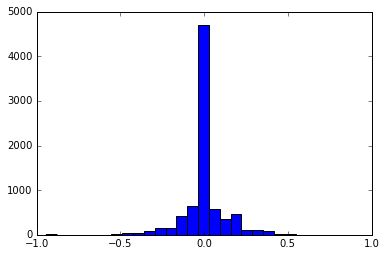

In [1]:
import csv
import matplotlib.image as mpimg
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
angles = []
k = 0

for line in lines:
    if (k==0):
        print (line)
    else:
        angle = float(line[3])
        angles.append(angle)
    k+=1
    
angles = np.array(angles)   
plt.hist(angles.astype('float'), bins=30) 

In [2]:
image_paths = []
angles = []
k = 0

for line in lines:
    if (k > 0):
        angle = float(line[3])
        speed = float(line[6])
        if (speed > 20):
            if ((random.random() > 0.9)and(angle==0))or(angle>0):
                for i in range(3):
                    # Load images from center, left and right cameras
                    source_path = line[i]
                    tokens = source_path.split('/')
                    filename = tokens[-1]
                    local_path = "./data/IMG/" + filename
                    image_paths.append(local_path)
                correction = 0.2*(1 + random.random()/2.0)

                # Steering adjustment for center images
                angles.append(angle)

                # Add correction for steering for left images
                angles.append(angle+correction)

                # Minus correction for steering for right images
                angles.append(angle-correction)
    k+=1

image_paths = np.array(image_paths)
angles = np.array(angles)   

print('Before:', image_paths.shape[0], angles.shape[0])

Before: 6396 6396


After flipping: 12386


(array([  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.00000000e+01,
          3.60000000e+01,   1.02000000e+02,   1.34000000e+02,
          4.37000000e+02,   6.42000000e+02,   1.11800000e+03,
          1.36800000e+03,   1.11800000e+03,   1.01700000e+03,
          1.42300000e+03,   1.11800000e+03,   1.36800000e+03,
          1.11800000e+03,   6.42000000e+02,   4.37000000e+02,
          1.34000000e+02,   1.02000000e+02,   3.60000000e+01,
          1.00000000e+01,   4.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([-1.24008739, -1.1574149 , -1.0747424 , -0.99206991, -0.90939742,
        -0.82672493, -0.74405243, -0.66137994, -0.57870745, -0.49603496,
        -0.41336246, -0.33068997, -0.24801748, -0.16534499, -0.08267249,
         0.        ,  0.08267249,  0.16534499,  0.24801748,  0.33068997,
         0.41336246,  0.49603496,  0.57870745,  0.66137994,  0.74405243,
         0.82

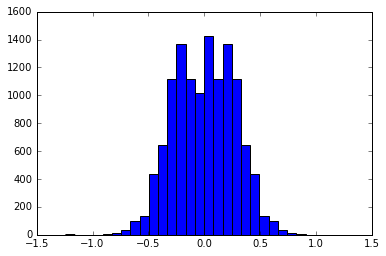

In [3]:
angles_flipped = []
for i in range(angles.shape[0]):
    angle = angles[i]
    angles_flipped.append(angle)
    if (abs(angle)>0):
        angles_flipped.append(-angle)
        
angles_flipped = np.array(angles_flipped) 
print('After flipping:', angles_flipped.shape[0])
plt.hist(angles_flipped.astype('float'), bins=30)

# 2. Design and Test a Model Architecture

Train: 5756 5756
Test: 640 640


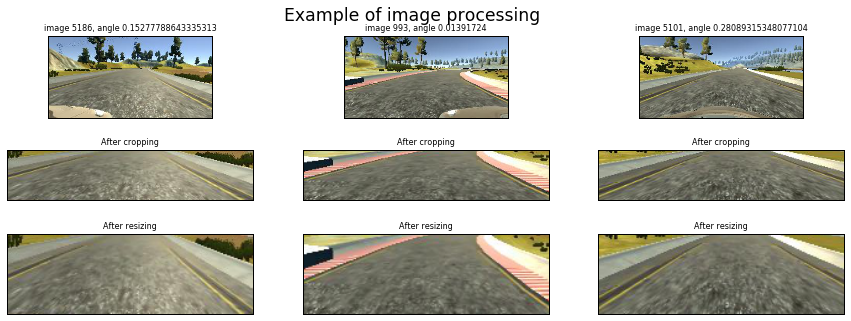

In [4]:
import cv2
import random
from sklearn.model_selection import train_test_split

def preprocess_image(img):

    new_img = img[70:135,:,:]
    # apply subtle blur
    #new_img = cv2.GaussianBlur(new_img, (3,3), 0)
    # scale to 65x200x3 (same as nVidia)
    new_img = cv2.resize(new_img,(200, 65), interpolation = cv2.INTER_AREA)
    # convert to YUV color space (as nVidia paper suggests)
    #new_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return new_img

# split into train/test sets
image_paths_train, image_paths_val, angles_train, angles_val = train_test_split(image_paths, angles,
                                                                                  test_size=0.1, random_state=17)
print('Train:', image_paths_train.shape[0], angles_train.shape[0])
print('Test:', image_paths_val.shape[0], angles_val.shape[0])

### Data exploration visualization code goes here.
f, ax = plt.subplots(3, 3, figsize=(15,5))
f.suptitle('Example of image processing', fontsize='xx-large')
font_size = 8
indicies = random.sample(range(0, len(image_paths_train)), 3)
for i in range(3):
    img = mpimg.imread(image_paths_train[indicies[i]])
    angle = angles[indicies[i]]
    ax[0,i].imshow(img)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    title = "image {0}, angle {1}".format(indicies[i], angle)
    ax[0,i].set_title(title, fontsize=font_size)
    new_img = img[70:135,:,:]
    ax[1,i].imshow(new_img)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    title = "After cropping"
    ax[1,i].set_title(title, fontsize=font_size)
    new_img = cv2.resize(new_img,(200, 65), interpolation = cv2.INTER_AREA)
    ax[2,i].imshow(new_img)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    title = "After resizing"
    ax[2,i].set_title(title, fontsize=font_size)

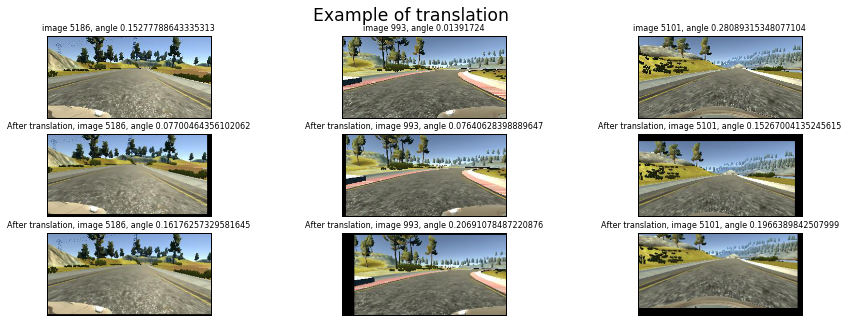

In [5]:
def trans_image(image,steer,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(320,160))
    return image_tr,steer_ang

f, ax = plt.subplots(3, 3, figsize=(15,5))
f.suptitle('Example of translation', fontsize='xx-large')
font_size = 8
for i in range(3):
    img = mpimg.imread(image_paths_train[indicies[i]])
    angle0 = angles[indicies[i]]
    ax[0,i].imshow(img)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    title = "image {0}, angle {1}".format(indicies[i], angle0)
    ax[0,i].set_title(title, fontsize=font_size)
    new_img, angle = trans_image(img, angle0, 50)
    ax[1,i].imshow(new_img)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    title = "After translation, image {0}, angle {1}".format(indicies[i], angle)
    ax[1,i].set_title(title, fontsize=font_size)
    new_img, angle = trans_image(img, angle0, 50)
    ax[2,i].imshow(new_img)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    title = "After translation, image {0}, angle {1}".format(indicies[i], angle)
    ax[2,i].set_title(title, fontsize=font_size)

## Brightness augmentation

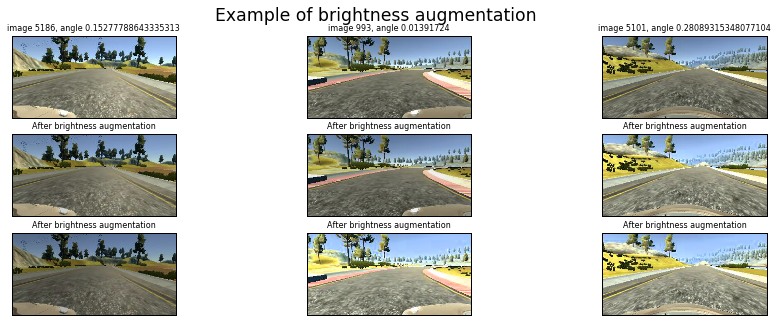

In [6]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

f, ax = plt.subplots(3, 3, figsize=(15,5))
f.suptitle('Example of brightness augmentation', fontsize='xx-large')
font_size = 8
for i in range(3):
    img = mpimg.imread(image_paths_train[indicies[i]])
    angle = angles[indicies[i]]
    ax[0,i].imshow(img)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    title = "image {0}, angle {1}".format(indicies[i], angle)
    ax[0,i].set_title(title, fontsize=font_size)
    new_img = augment_brightness_camera_images(img)
    ax[1,i].imshow(new_img)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    title = "After brightness augmentation"
    ax[1,i].set_title(title, fontsize=font_size)
    new_img = augment_brightness_camera_images(new_img)
    ax[2,i].imshow(new_img)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    title = "After brightness augmentation"
    ax[2,i].set_title(title, fontsize=font_size)

## Shadow augmentation

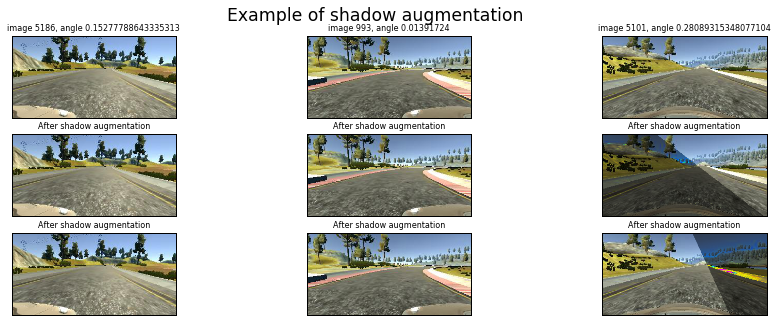

In [7]:
def add_random_shadow(image):
    top_y = 320*np.random.uniform()
    top_x = 0
    bot_x = 160
    bot_y = 320*np.random.uniform()
    image_hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0],0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0],0:image.shape[1]][1]
    shadow_mask[((X_m-top_x)*(bot_y-top_y) -(bot_x - top_x)*(Y_m-top_y) >=0)]=1
    if np.random.randint(2)==1:
        random_bright = .5
        cond1 = shadow_mask==1
        cond0 = shadow_mask==0
        if np.random.randint(2)==1:
            image_hls[:,:,1][cond1] = image_hls[:,:,1][cond1]*random_bright
        else:
            image_hls[:,:,1][cond0] = image_hls[:,:,1][cond0]*random_bright    
    image = cv2.cvtColor(image_hls,cv2.COLOR_HLS2RGB)
    return image

f, ax = plt.subplots(3, 3, figsize=(15,5))
f.suptitle('Example of shadow augmentation', fontsize='xx-large')
font_size = 8
for i in range(3):
    img = mpimg.imread(image_paths_train[indicies[i]])
    angle = angles[indicies[i]]
    ax[0,i].imshow(img)
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    title = "image {0}, angle {1}".format(indicies[i], angle)
    ax[0,i].set_title(title, fontsize=font_size)
    new_img = add_random_shadow(img)
    ax[1,i].imshow(new_img)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    title = "After shadow augmentation"
    ax[1,i].set_title(title, fontsize=font_size)
    new_img = add_random_shadow(img)
    ax[2,i].imshow(new_img)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    title = "After shadow augmentation"
    ax[2,i].set_title(title, fontsize=font_size)

In [8]:
from sklearn.utils import shuffle

def generate_training_data(image_paths, angles, batch_size=128, validation_flag=False):
    image_paths, angles = shuffle(image_paths, angles)
    X,y = ([],[])
    while True:       
        for i in range(len(angles)):
            img = mpimg.imread(image_paths[i])
            angle = angles[i]
            #img, angle = trans_image(img, angle, 50)
            img = augment_brightness_camera_images(img)
            img = add_random_shadow(img)
            img = preprocess_image(img)
            X.append(img)
            y.append(angle)
            if len(X) == batch_size:
                yield (np.array(X), np.array(y))
                X, y = ([],[])
                image_paths, angles = shuffle(image_paths, angles)
            # flip horizontally and invert steer angle, if magnitude is > 0
            if abs(angle) > 0:
                flipped_img = np.fliplr(img)
                flipped_angle = -angle
                X.append(flipped_img)
                y.append(flipped_angle)
            if len(X) == batch_size:
                yield (np.array(X), np.array(y))
                X, y = ([],[])
                image_paths, angles = shuffle(image_paths, angles)

Using TensorFlow backend.


Epoch 1/20
179/179 [============================>.] - ETA: 0s - loss: 0.0549- E
{'loss': 0.054840865710543259, 'val_loss': 0.032628443092107773}
Should be: -0.229, 0.421, 0.090, 0.177, -0.202
Predicted: -0.152, 0.341, -0.064, 0.034, -0.121
180/179 [==============================] - 42s - loss: 0.0548 - val_loss: 0.0326
Epoch 2/20
179/179 [============================>.] - ETA: 0s - loss: 0.0325- ETA: 1s - loss: 0
{'loss': 0.032580715257467495, 'val_loss': 0.029131362913176417}
Should be: -0.229, 0.421, 0.090, 0.177, -0.202
Predicted: -0.132, 0.327, 0.004, 0.123, -0.167
180/179 [==============================] - 41s - loss: 0.0326 - val_loss: 0.0291
Epoch 3/20
179/179 [============================>.] - ETA: 0s - loss: 0.0282
{'loss': 0.028171997041338021, 'val_loss': 0.02592464191839099}
Should be: -0.229, 0.421, 0.090, 0.177, -0.202
Predicted: -0.093, 0.215, -0.074, 0.032, -0.183
180/179 [==============================] - 39s - loss: 0.0282 - val_loss: 0.0259
Epoch 4/20
179/179 [======

dict_keys(['loss', 'val_loss'])


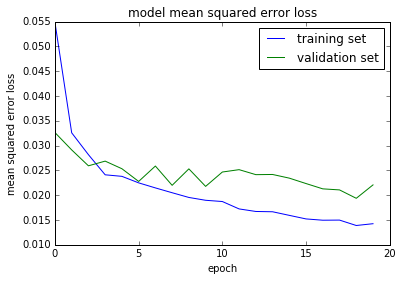

In [9]:
import tensorflow as tf

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, ELU
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Cropping2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback
from keras.regularizers import l2
import time

BATCH_SIZE = 64
H, W, CH = 65, 200, 3
LR = 1e-4
L2_REG_SCALE = 0.

class debugCallback(Callback):
    def on_epoch_end(self, batch, logs={}):
        samples = image_paths_val[:5]
        angles = angles_val[:5]
        print()
        print(logs)
        x = [angle for angle in angles]
        print("Should be: "+', '.join(['%.3f']*len(x)) % tuple(x))
        angles = []
        for filename in samples:
            img = mpimg.imread(filename)
            img = preprocess_image(img)
            angle = model.predict(img[None, :, :, :], batch_size=1)
            angles.append(angle)
        #Print predicted driving angle for first example
        print("Predicted: "+', '.join(['%.3f']*len(x)) % tuple(angles))
               
        
def convert_color(image):
    from keras.backend import tf as ktf   
    image = ktf.image.rgb_to_hsv(image)
    return image

def commaai_model():
    ch, row, col = CH, H, W 
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1.,
                     input_shape=(row, col, ch),
                     output_shape=(row, col, ch)))
    model.add(Convolution2D(16, (8, 8), subsample=(4, 4), padding='same'))
    model.add(ELU())
    model.add(Convolution2D(32, (5, 5), subsample=(2, 2), padding='same'))
    model.add(ELU())
    model.add(Convolution2D(64, (5, 5), subsample=(2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(.2))
    model.add(ELU())
    model.add(Dense(512))
    model.add(Dropout(.5))
    model.add(ELU())
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=LR), loss='mean_squared_error')

    return model

def lenet_model():
    model = Sequential()

    # Normalizing lambda layer
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
    #model.add(Lambda(convert_color, output_shape=(65,320,3)))
    model.add(Cropping2D(cropping=((55,25),(20,20))))

    # First convolutional layer
    model.add(Convolution2D(32,(3,3),activation="elu"))
    model.add(MaxPooling2D())

    # Second convolutional layer
    model.add(Convolution2D(32,(3,3),activation="elu"))
    model.add(MaxPooling2D())
    
    model.add(Convolution2D(64,(3,3),activation="elu"))
    model.add(MaxPooling2D())
    
    model.add(Convolution2D(128,(3,3),activation="elu"))
    model.add(MaxPooling2D())
    
    model.add(Flatten())

    # Fully-connected layers
    model.add(Dense(1024, activation="elu"))
    model.add(Dropout(.5))
    model.add(Dense(512, activation="elu"))
    model.add(Dropout(.5))
    model.add(Dense(1, activation="linear"))

    model.compile(loss = 'mse', optimizer ='adam')
    
    return model

def nvidia_model():
    model = Sequential()

    model.add(Lambda(lambda x: x/127.5 - 1.,input_shape=(65,200,3)))
    #model.add(Cropping2D(cropping=((55,25),(20,20))))
    model.add(Convolution2D(24, (5, 5), padding="valid", strides=(2, 2), 
                            kernel_initializer='he_normal', name='conv1'))
    model.add(ELU())
    model.add(Convolution2D(36, (5, 5), padding="valid", strides=(2, 2), 
                            kernel_initializer='he_normal', name='conv2'))
    model.add(ELU())
    model.add(Convolution2D(48, (5, 5), padding="valid", strides=(2, 2), 
                            kernel_initializer='he_normal', name='conv3'))
    model.add(ELU())
    model.add(Convolution2D(64, (3, 3), padding="valid", 
                            kernel_initializer='he_normal', name='conv4'))
    model.add(ELU())
    model.add(Convolution2D(64, (3, 3), padding="valid", 
                            kernel_initializer='he_normal', name='conv5'))
    model.add(Flatten(name='flatten1'))
    model.add(Dense(1164, kernel_initializer='he_normal', name='dense1', activation='relu'))
    model.add(Dense(100, kernel_initializer='he_normal', name='dense2', activation='relu'))
    #model.add(Dropout(.5))
    model.add(Dense(50, kernel_initializer='he_normal', name='dense3', activation='relu'))
    #model.add(Dropout(.5))
    model.add(Dense(10, kernel_initializer='he_normal', name='dense4', activation='relu'))
    #model.add(Dropout(.2))
    model.add(Dense(1, kernel_initializer='he_normal', name='dense5'))

    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
    model.compile(optimizer=adam, loss='mse')
    
    return model  
    
    
model = nvidia_model()
# initialize generators
train_gen = generate_training_data(image_paths_train, angles_train,
                                   validation_flag=False, batch_size=BATCH_SIZE)
val_gen = generate_training_data(image_paths_val, angles_val,
                                 validation_flag=True, batch_size=BATCH_SIZE)
checkpoint = ModelCheckpoint('model{epoch:02d}.h5')
debug = debugCallback()
train_start_time = time.time()
history_object = model.fit_generator(callbacks=[checkpoint, debug], generator=train_gen, 
                                     validation_data=val_gen, epochs=20,
                                     steps_per_epoch=image_paths_train.shape[0]*2/BATCH_SIZE, 
                                     verbose=1, 
                                     validation_steps=image_paths_val.shape[0]*2/BATCH_SIZE)
total_time = time.time() - train_start_time
print('Total training time: %.2f sec (%.2f min)' % (total_time, total_time/60))

print(model.summary())
model.save('./model.h5')

# print the keys contained in the history object
print(history_object.history.keys())

# plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

## Predict angle stearing for test images

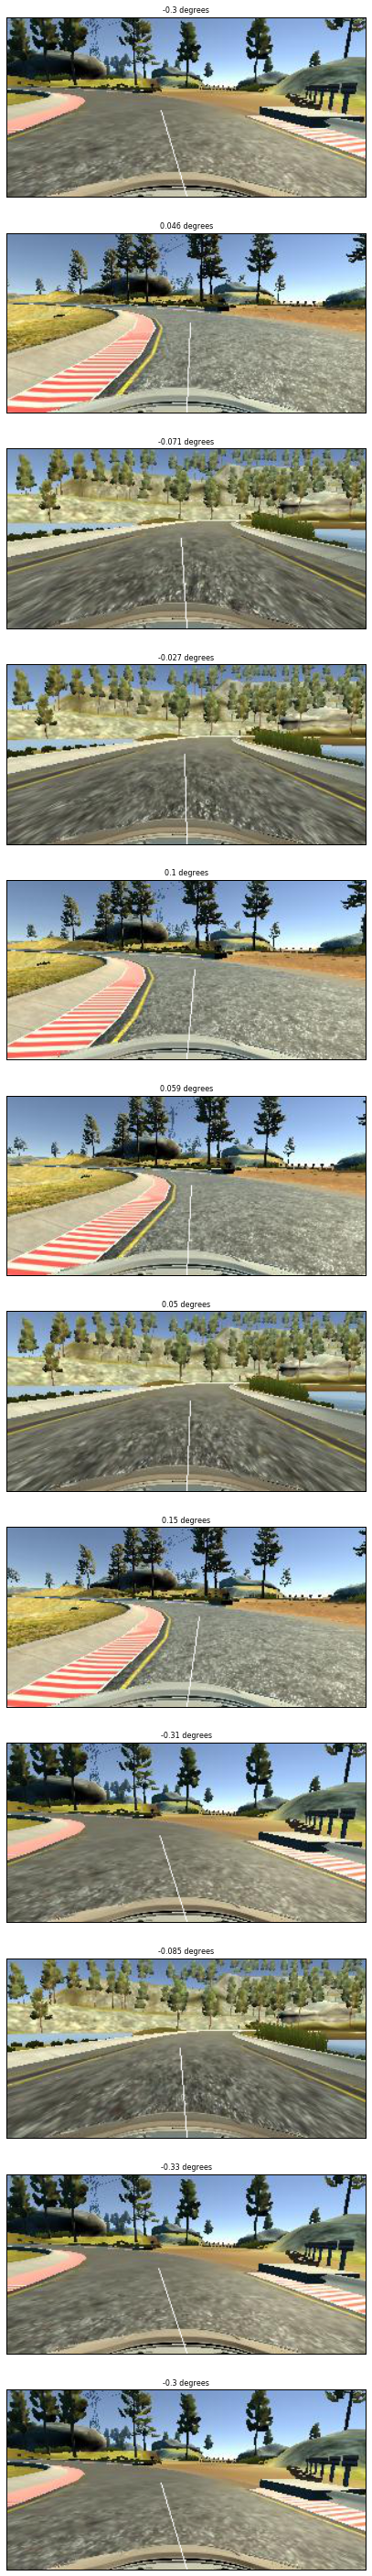

In [10]:
import glob
from skimage import draw

def draw_angle_line(image, angle):
    img = np.copy(image)
    s = img.shape
    line_len = s[0]//2
    angle = angle / 360 * np.pi * 100 # Times 100 just to make it more visible
    line_y, line_x = int(line_len * np.cos(angle)), int(line_len * np.sin(angle))
    rr,cc = draw.line(s[0]-1, s[1]//2, s[0]-1-line_y, s[1]//2 + line_x)
    img[rr,cc,:] = 255
    return img, angle

filenames = glob.glob('test_images/*.jpg')
f, ax = plt.subplots(len(filenames),1, figsize=(15,50))
for i, filename in enumerate(filenames):
    img = mpimg.imread(filename)
    new_img = preprocess_image(img)
    model.load_weights('model09.h5')
    angle = model.predict(new_img[None,:,:,:])
    img, angle = draw_angle_line(img, angle)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    title = "{:.2} degrees".format(float(angle))
    ax[i].set_title(title, fontsize=font_size)